In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# multi-class classification with Keras
import pandas as pd
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


In [ ]:
# load dataset
# train_df = pandas.read_csv("/content/drive/MyDrive/mary/For LSTM/Train_60.csv", header= 0, dtype= "object")

# test_df = pandas.read_csv("/content/drive/MyDrive/mary/For LSTM/Test_15.csv", header= 0, dtype= "object")

df = pd.read_csv("/content/drive/MyDrive/mary/For LSTM/final_lstm_data.csv", header= 0, dtype= "category")
# print(train_df)
# print(test_df)
print(df)

      Checker  Gender DOW  ... Weight Change:Weight loss NewLoABins D(7)-NewLoABins
0         145  Female   7  ...                        NO          0               0
1         145  Female   1  ...                        NO          0               0
2         145  Female   2  ...                        NO          0               0
3         145  Female   3  ...                        NO          0               0
4         145  Female   4  ...                        NO          0               0
...       ...     ...  ..  ...                       ...        ...             ...
71601    2804  Female   5  ...                       YES          0               0
71602    2804  Female   6  ...                       YES          0               0
71603    2804  Female   7  ...                       YES          0               0
71604    2804  Female   1  ...                       YES          0               0
71605    2804  Female   2  ...                       YES          0         

To create D+7 vars

In [ ]:
##machineLearningMastery
from pandas import DataFrame
from pandas import concat


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	return agg

In [ ]:

# # normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)
# # frame as supervised learning
# reframed = series_to_supervised(scaled, 1, 1)
# # drop columns we don't want to predict
# # reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
# print(reframed.head())

In [ ]:
# X_train = train_df.iloc[:, :176]
# X_train = X_train.drop(columns=['D(-6)-Checker'])
# X_train.head(5)

df_X = df.iloc[:, :176]
df_X = df_X.drop(columns=['Checker'])
df_X.head(10)


,Gender,DOW,DOY,Age at Assessment,Payment: Self pay ROC,Ability to Understand Others:Understanding verbal information content,Aboriginal Identity:Inuit,Aboriginal Identity:Metis,Activities Average Time,Activities Preferance: Crafts or arts,Activities Preferance: Gardening or plants,Activities Preferance: Helping others,Activities Preferance: Reading or writing,Activities Preferance: Spiritual or religious activities,Activities Preferance: Talking or conversing,Activities Preferance: Trips or shopping,Activities Preferance: Watching TV,ADL Function: Client believes capable of increased independence,ADL Function: Direct care staff believe resident is capable of increased independence,ADL Function: Resident able to do activity very slow,Advance Directives:Resuscitating,Alcohol Use,Appliances and Program: Any scheduled toileting plan,Appliances and Program: Pads or briefs used,Awerness: Easily distracted,Balance: Sitting,Balance: Standing,BMI,Bowel Elimation Pattern: Regular,Can Client Bear 75 Percent of Own Weight,Change in Behavioural Symptoms,Change in Cognitive Status,Change in Communication or Hearing,Change in Daily Routine: Currently involved activities,Change in Daily Routine: Extented activities,Change in Mood,Change in Urinary Continence,Cognitive Skills for Daily Decision Making,DD Status: Epilepsy,DD Status: Not applicable,...,Sadness: Persistant anger,Sadness: Repetitive Verbalization,Sadness: Unpleasant morning mood,Sadness: Worried facial expressions,Skin Problem: Rashes,Skin Treatment: Application of medications,Special Treatments: Alzheimers or dementia special care unit,Speech Clarity,Stability of Conditions: Unstable,Symptom Alterability: Physically abuse,Symptom Alterability: Resists care,Symptom Alterability: Socially inappropriate,Symptom Alterability: Verbally abusive,Symptom Alterability: Wandering,Symptom Frequency: Physically abuse,Symptom Frequency: Resists care,Symptom Frequency: Socially inappropriate,Symptom Frequency: Verbally abusive,Symptom Frequency: Wandering,Task Segmentation,Time Awake: AFTERNOON,Time Awake: EVENING,Time Awake: MORNING,Transfer Mode: Bed rails,Transfer Mode: Lifted Mechanically,Transfer Mode: Transfer Aid,Type of Ulcer: Pressure ulcer,Type of Ulcer: Stasis ulcer,Ulcers: Stage 2,Ulcers: Stage 3,Ulcers: Stage 4,Unsettled Rel: Does not adjust easily to change in routines,Unsettled Rel: Openly expresses conflict/anger with family/friends,Unsettled Rel: Unhappy with clients other than roommate,Vision,Visual Appliances,Weight Bearing,Weight Change:Weight gain,Weight Change:Weight loss,NewLoABins
0,Female,7,89,81,NO,Usually,Dont Know,Dont Know,Little,YES,NO,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,NO,NO,NO,Present - Not recent,maintained position,maintained position,Dont Know,YES,YES,No change,No change,No change,No change,No change,No change,No change,Moderately impaired,NO,NO,...,exhibited daily,exhibited daily,not exhibited in last MONTH,not exhibited in last MONTH,NO,NO,NO,NO,YES,easily altered,easily altered,easily altered,not easily altered,not easily altered,not exhibed,not exhibed,not exhibed,occurred daily,occurred daily,YES,YES,YES,YES,NO,NO,NO,None,Dont Know,Dont Know,Dont Know,Dont Know,NO,NO,NO,Adequate,NO,NO,YES,NO,0
1,Female,1,90,81,NO,Usually,Dont Know,Dont Know,Little,YES,NO,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,NO,NO,NO,Present - Not recent,maintained position,maintained position,Dont Know,YES,YES,No change,No change,No change,No change,No change,No change,No change,Moderately impaired,NO,NO,...,exhibited daily,exhibited daily,not exhibited in last MONTH,not exhibited in last MONTH,NO,NO,NO,NO,YES,easily altered,easily altered,easily altered,not easily altered,not easily altered,not exhibed,not exhibed,not exhibed,occurred daily,occurred daily,YES,YES,YES,YES,NO,NO,NO,None,Dont Know,Dont Know,Dont Know,Dont Know,NO,NO,NO,Adequate,NO,NO,YES,NO,0
2,Female,2,91,81,NO,Usually,Dont Know,Dont Know,Little,YES,NO,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,NO,NO,NO,Present - Not recent,mainta

In [ ]:
# Y_train = train_df.iloc[:, -1:]
# Y_train.head(5)
df_Y = df.iloc[:, -1:]
df_Y.head(5)


,D(7)-NewLoABins
0,0
1,0
2,0
3,0
4,0


In [ ]:
# X_test = test_df.iloc[:, :176]
# X_test = X_test.drop(columns=['D(-6)-Checker'])
# X_test.head(5)

In [ ]:
# Y_test = test_df.iloc[:, -1:]
# Y_test.head(5)

In [ ]:
convert_dict = {'DOW': int,
                'DOY': int,
                'Age at Assessment': int
               }

In [ ]:
# X_train = X_train.astype(convert_dict)
# X_test = X_test.astype(convert_dict)
# print(X_train.dtypes)
# print(X_test.dtypes)

df_X = df_X.astype(convert_dict)
print(df_X.dtypes)

Gender                       category
DOW                             int64
DOY                             int64
Age at Assessment               int64
Payment: Self pay ROC        category
                               ...   
Visual Appliances            category
Weight Bearing               category
Weight Change:Weight gain    category
Weight Change:Weight loss    category
NewLoABins                   category
Length: 175, dtype: object


##Label Encoding and One-Hot Encoding

In [ ]:
# import labelencoder
import numpy as np
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
oe_labels = OneHotEncoder(sparse=False)

###Lebel Encoding

In [ ]:
# X_train = X_train.apply(le.fit_transform)

# X_train.head(5)

df_X_le = df_X.apply(le.fit_transform)
df_X_le.head(5)

,Gender,DOW,DOY,Age at Assessment,Payment: Self pay ROC,Ability to Understand Others:Understanding verbal information content,Aboriginal Identity:Inuit,Aboriginal Identity:Metis,Activities Average Time,Activities Preferance: Crafts or arts,Activities Preferance: Gardening or plants,Activities Preferance: Helping others,Activities Preferance: Reading or writing,Activities Preferance: Spiritual or religious activities,Activities Preferance: Talking or conversing,Activities Preferance: Trips or shopping,Activities Preferance: Watching TV,ADL Function: Client believes capable of increased independence,ADL Function: Direct care staff believe resident is capable of increased independence,ADL Function: Resident able to do activity very slow,Advance Directives:Resuscitating,Alcohol Use,Appliances and Program: Any scheduled toileting plan,Appliances and Program: Pads or briefs used,Awerness: Easily distracted,Balance: Sitting,Balance: Standing,BMI,Bowel Elimation Pattern: Regular,Can Client Bear 75 Percent of Own Weight,Change in Behavioural Symptoms,Change in Cognitive Status,Change in Communication or Hearing,Change in Daily Routine: Currently involved activities,Change in Daily Routine: Extented activities,Change in Mood,Change in Urinary Continence,Cognitive Skills for Daily Decision Making,DD Status: Epilepsy,DD Status: Not applicable,...,Sadness: Persistant anger,Sadness: Repetitive Verbalization,Sadness: Unpleasant morning mood,Sadness: Worried facial expressions,Skin Problem: Rashes,Skin Treatment: Application of medications,Special Treatments: Alzheimers or dementia special care unit,Speech Clarity,Stability of Conditions: Unstable,Symptom Alterability: Physically abuse,Symptom Alterability: Resists care,Symptom Alterability: Socially inappropriate,Symptom Alterability: Verbally abusive,Symptom Alterability: Wandering,Symptom Frequency: Physically abuse,Symptom Frequency: Resists care,Symptom Frequency: Socially inappropriate,Symptom Frequency: Verbally abusive,Symptom Frequency: Wandering,Task Segmentation,Time Awake: AFTERNOON,Time Awake: EVENING,Time Awake: MORNING,Transfer Mode: Bed rails,Transfer Mode: Lifted Mechanically,Transfer Mode: Transfer Aid,Type of Ulcer: Pressure ulcer,Type of Ulcer: Stasis ulcer,Ulcers: Stage 2,Ulcers: Stage 3,Ulcers: Stage 4,Unsettled Rel: Does not adjust easily to change in routines,Unsettled Rel: Openly expresses conflict/anger with family/friends,Unsettled Rel: Unhappy with clients other than roommate,Vision,Visual Appliances,Weight Bearing,Weight Change:Weight gain,Weight Change:Weight loss,NewLoABins
0,0,6,88,33,0,3,0,0,1,2,1,2,1,2,1,1,1,0,1,0,2,1,0,0,2,4,4,0,2,2,3,3,2,2,2,3,2,1,1,1,...,1,1,3,3,0,0,0,1,1,1,1,1,2,2,1,1,1,4,4,2,1,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,2,1,0
1,0,0,89,33,0,3,0,0,1,2,1,2,1,2,1,1,1,0,1,0,2,1,0,0,2,4,4,0,2,2,3,3,2,2,2,3,2,1,1,1,...,1,1,3,3,0,0,0,1,1,1,1,1,2,2,1,1,1,4,4,2,1,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,2,1,0
2,0,1,90,33,0,3,0,0,1,2,1,2,1,2,1,1,1,0,1,0,2,1,0,0,2,4,4,0,2,2,3,3,2,2,2,3,2,1,1,1,...,1,1,3,3,0,0,0,1,1,1,1,1,2,2,1,1,1,4,4,2,1,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,2,1,0
3,0,2,91,33,0,3,0,0,1,2,1,2,1,2,1,1,1,0,1,0,2,1,0,0,2,4,4,0,2,2,3,3,2,2,2,3,2,1,1,1,...,1,1,3,3,0,0,0,1,1,1,1,1,2,2,1,1,1,4,4,2,1,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,2,1,0
4,0,3,92,33,0,3,0,0,1,2,1,2,1,2,1,1,1,0,1,0,2,1,0,0,2,4,4,0,2,2,3,3,2,2,2,3,2,1,1,1,...,1,1,3,3,0,0,0,1,1,1,1,1,2,2,1,1,1,4,4,2,1,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,2,1,0


In [ ]:
# Y_train = Y_train.apply(le.fit_transform)
# Y_train.head(5)
df_Y_le = df_Y.apply(le.fit_transform)
print(df_Y_le)

       D(7)-NewLoABins
0                    0
1                    0
2                    0
3                    0
4                    0
...                ...
71601                0
71602                0
71603                0
71604                0
71605                0

[71606 rows x 1 columns]


##Creating 7 days data

In [ ]:
# X_train = np.array(columnTransformer.fit_transform(X_train), dtype = np.str)

# print(X_train)
df_X_seven = series_to_supervised(df_X_le, 1, 6 )
df_X_seven = df_X_seven.fillna(0)
print(df_X_seven)

       var1(t-1)  var2(t-1)  var3(t-1)  ...  var173(t+5)  var174(t+5)  var175(t+5)
0            0.0        0.0        0.0  ...          2.0          1.0          0.0
1            0.0        6.0       88.0  ...          2.0          1.0          0.0
2            0.0        0.0       89.0  ...          2.0          1.0          0.0
3            0.0        1.0       90.0  ...          2.0          1.0          0.0
4            0.0        2.0       91.0  ...          2.0          1.0          0.0
...          ...        ...        ...  ...          ...          ...          ...
71601        0.0        3.0      240.0  ...          0.0          0.0          0.0
71602        0.0        4.0      241.0  ...          0.0          0.0          0.0
71603        0.0        5.0      242.0  ...          0.0          0.0          0.0
71604        0.0        6.0      243.0  ...          0.0          0.0          0.0
71605        0.0        0.0      244.0  ...          0.0          0.0          0.0

[71

###One-Hot Encoding

In [ ]:
# X_tr = X_train.values
# X_tr = X_tr.astype(str)
# X_train = oe_labels.fit_transform(X_train)

df_X_oe = oe_labels.fit_transform(df_X_seven)
print(df_X_oe)

[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]


In [ ]:
print(df_X_oe.shape)

(71606, 6825)


In [ ]:
# values1 = X_train.values
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_Train_scaled = scaler.fit_transform(values1)
# # frame as supervised learning
# X_train = series_to_supervised(X_Train_scaled, 1, 5)
# print(X_train)

# df_X_seven = series_to_supervised(df_X_oe, 1, 5 )


In [ ]:
# df_X_seven = df_X_seven.fillna(0)
print(df_X_oe)

[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]


In [ ]:
df_Y_oe = oe_labels.fit_transform(df_Y_le)
print(df_Y_oe)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
# df_X_seven.to_csv('y_train.csv')

In [ ]:
# Y_train = oe_labels.fit_transform(Y_train)

# print(Y_train)

In [ ]:
# Y_train.shape

In [ ]:
# values2 = Y_train.values
# scaler = MinMaxScaler(feature_range=(0, 1))
# Y_Train_scaled = scaler.fit_transform(values2)
# # frame as supervised learning
# # reframed = series_to_supervised(scaled, 1, 1)
# print(Y_Train_scaled)

In [ ]:
# X_test = X_test.apply(le.fit_transform)
# X_test.head(5)

In [ ]:
# X_test = oe_labels.fit_transform(X_test)

In [ ]:
# values3 = X_test.values
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_Test_scaled = scaler.fit_transform(values3)
# # frame as supervised learning
# X_test = series_to_supervised(X_Test_scaled, 1, 5)
# print(X_test)

In [ ]:
# X_test = np.array(columnTransformer.fit_transform(X_test), dtype = np.str)

# print(X_test)

In [ ]:
# X_test.shape

In [ ]:
# Y_test = Y_test.apply(le.fit_transform)
# Y_test.head(5)

In [ ]:
# Y_test = oe_labels.fit_transform(Y_test)

# print(Y_test)

In [ ]:
# values4 = Y_test.values
# scaler = MinMaxScaler(feature_range=(0, 1))
# Y_test = scaler.fit_transform(values4)
# # frame as supervised learning
# # reframed = series_to_supervised(scaled, 1, 1)
# print(Y_test)

##Split Dataset into Training and Testing Subsets

In [ ]:
df_train_x = df_X_oe[:59464,:]
df_testval_x = df_X_oe[59464:,:]
df_train_y = df_Y_oe[:59464,:]
df_testval_y = df_Y_oe[59464:,:]
# print(df_train_x)
# print(df_train_y)

In [ ]:
df_val_x = df_testval_x[:10909,:]
df_test_x = df_testval_x[10909:,:]
df_val_y = df_testval_y[:10909,:]
df_test_y = df_testval_y[10909:,:]

In [ ]:
print(df_test_y.shape)

(1233, 4)


In [ ]:
print(df_val_x.shape)

(10909, 6825)


In [ ]:
# df_train_Y_forsampling = np.argmax(df_train_y, axis=1)
# print(df_train_Y_forsampling)


In [ ]:
# from collections import Counter

# print(Counter(df_train_Y_forsampling))
# print(df_train_Y_forsampling.shape)

## Under Sampling

In [ ]:
# pip install imblearn

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# undersample = RandomUnderSampler(sampling_strategy='majority')
# X_under, Y_under = undersample.fit_resample(df_train_x, df_train_Y_forsampling)
# print(X_under.shape)
# print(Y_under.shape)
# X_under_1, Y_under_1 = undersample.fit_resample(X_under, Y_under)
# print(X_under_1.shape)
# print(Y_under_1.shape)
# X_under_2, Y_under_2 = undersample.fit_resample(X_under_1, Y_under_1)
# print(X_under_2.shape)
# print(Y_under_2.shape)

In [ ]:
# print(Counter(Y_under_2))

In [ ]:
# Y_under_2 = Y_under_2.reshape(-1, 1)

In [ ]:
# Y_under_2 = oe_labels.fit_transform(Y_under_2)

##Over Sampling

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

In [ ]:
# oversample = RandomOverSampler(sampling_strategy='minority')
# X_over, Y_over = oversample.fit_resample(df_train_x, df_train_Y_forsampling)
# print(X_over.shape)
# print(Y_over.shape)


In [ ]:
# X_over_1, Y_over_1 = oversample.fit_resample(X_over, Y_over)
# print(X_over_1.shape)
# print(Y_over_1.shape)
# X_over_2, Y_over_2 = oversample.fit_resample(X_over_1, Y_over_1)
# print(X_over_2.shape)
# print(Y_over_2.shape)

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
df_train_x = df_train_x.reshape((df_train_x.shape[0], 1, 6825))
df_test_x = df_test_x.reshape((df_test_x.shape[0], 1, 6825))
df_val_x = df_val_x.reshape((df_val_x.shape[0], 1, 6825))
print(df_train_x.shape, df_train_y.shape, df_test_x.shape, df_test_y.shape)

(59464, 1, 6825) (59464, 4) (1233, 1, 6825) (1233, 4)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(df_train_x.shape[1], df_train_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
adam = optimizers.Adam(lr=0.001, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
# history = model.fit(X_train, Y_train, epochs=1, batch_size=72, validation_data=(X_test, Y_test), verbose=2, shuffle=False)
# # plot history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               3560448   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                

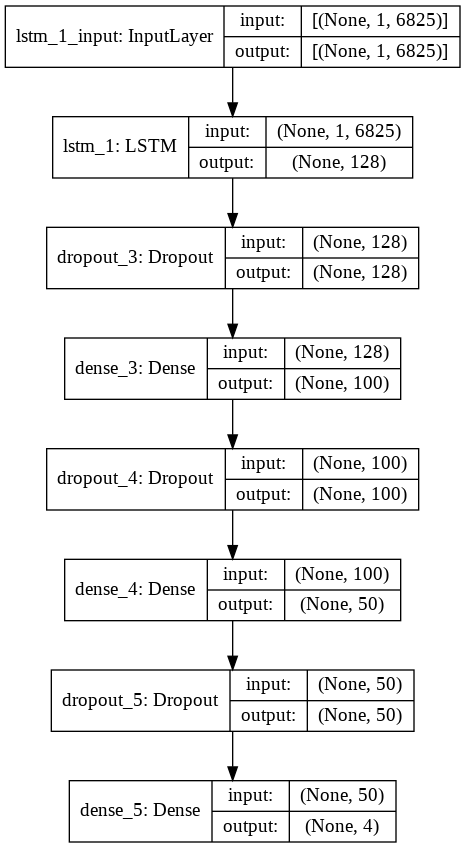

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True,show_layer_names=True,)

In [ ]:
history =model.fit(df_train_x, df_train_y, validation_data=(df_val_x, df_val_y), epochs=50, batch_size=32, verbose= 1)

# Final evaluation of the model
# scores = model.evaluate(df_test_x,df_test_y, verbose=1)
# print('Test loss:', scores)
# print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/50
1859/1859 [==============================] - 59s 31ms/step - loss: 0.3126 - accuracy: 0.9177 - val_loss: 0.4371 - val_accuracy: 0.8982
Epoch 2/50
1859/1859 [==============================] - 57s 31ms/step - loss: 0.2581 - accuracy: 0.9269 - val_loss: 0.4286 - val_accuracy: 0.9000
Epoch 3/50
1859/1859 [==============================] - 57s 31ms/step - loss: 0.2400 - accuracy: 0.9307 - val_loss: 0.4291 - val_accuracy: 0.9009
Epoch 4/50
1859/1859 [==============================] - 57s 30ms/step - loss: 0.2375 - accuracy: 0.9299 - val_loss: 0.4507 - val_accuracy: 0.8998
Epoch 5/50
1859/1859 [==============================] - 57s 31ms/step - loss: 0.2372 - accuracy: 0.9296 - val_loss: 0.4461 - val_accuracy: 0.8999
Epoch 6/50
1859/1859 [==============================] - 57s 31ms/step - loss: 0.2329 - accuracy: 0.9311 - val_loss: 0.4544 - val_accuracy: 0.8982
Epoch 7/50
1859/1859 [==============================] - 59s 32ms/step - loss: 0.2267 - accuracy: 0.9312 - val_loss: 0.4692 -

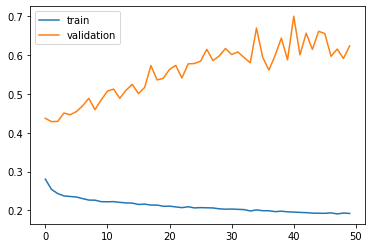

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
pred_values = model.predict(df_test_x)
# print('pred_values: ', pred_values)
print('pred_values: ', np.sum(pred_values))

# print('true_values: ', y_test)
print('true_values:', np.sum(df_test_y))

In [ ]:
pred = np.argmax(pred_values, axis=1)
df_test_y = np.argmax(df_test_y, axis=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df_test_y, pred))

In [ ]:
pred_values = oe_labels.inverse_transform(pred_values)

In [ ]:
print(pred_values)

In [ ]:
print(df_test_y.shape)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(df_test_y, pred)

print(cm)

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train loss')

plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt